<a href="https://www.kaggle.com/aminizahra/titanic-prediction-90-accuracy?scriptVersionId=88419294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
🚢🛳 Titanic Prediction 🛳🚢
</h1>
</div>

<img src="https://s4.uupload.ir/files/1161691_vh1b.jpg" border="0" alt="آپلود عکس" />

<div style="color: #D81F26;
           display:fill;
           border-radius:0px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737 ;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px;">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Logistic Regression — Detailed Overview
</h1>    
<hr>

<p style="color:white;">Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.</p>

<p style="color:white;">For example:</p>

<p style="color:white;">1.To predict whether an email is spam (1) or (0)</p>

<p style="color:white;">2.Whether the tumor is malignant (1) or not (0)</p>
    
<p style="color:white;">Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.</p>

<p style="color:white;">From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.</p>

Simple Logistic Regression

<p style="color:white;">Sigmoid Function</p>

<img src="https://s4.uupload.ir/files/1_rqxfpingwdikbwyljc_e7g_4v5i.png" border="2" alt="آپلود عکس"/>

</div>

<div style="color:#D81F26;
           display:fill;
           border-radius:5px;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
📤 Import Libraries
</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score

from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

%matplotlib inline

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
           color:#D81F26;">
Read Datasets
</h1>
</div>

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')

df_test = pd.read_csv('../input/titanic/test.csv') 

df_y_test = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
df_test['Survived'] = df_y_test['Survived']

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
💾 Check out the Data
</h1>
</div>

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


<AxesSubplot:>

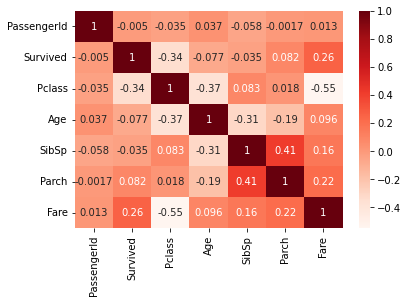

In [6]:
sns.heatmap(df_train.corr(), annot=True,cmap='Reds')

<AxesSubplot:>

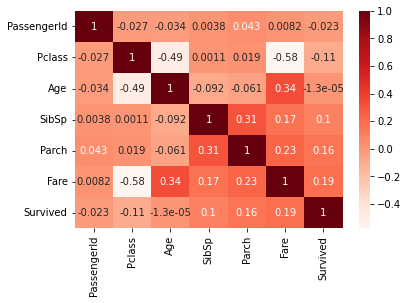

In [7]:
sns.heatmap(df_test.corr(), annot=True,cmap='Reds')

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Data preparation
</h1>
</div>

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Train set
</h1>
</div>

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
pd.DataFrame([df_train.corr()['Survived'].sort_values()])

,Pclass,Age,SibSp,PassengerId,Parch,Fare,Survived
Survived,-0.338481,-0.077221,-0.035322,-0.005007,0.081629,0.257307,1.0


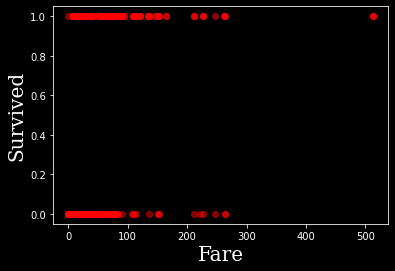

In [10]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

plt.style.use('dark_background')

fig, ax = plt.subplots()

X=df_train['Fare']
y=df_train['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y, 'ro', alpha=0.5)

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
100*(df_train.isnull().sum()/len(df_train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [14]:
nan_percent= missing_percent(df_train)

In [15]:
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Embarked'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

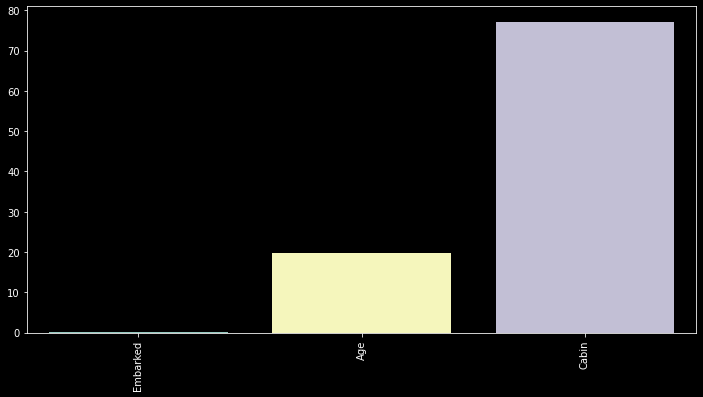

In [16]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [17]:
nan_percent[nan_percent<1].index

Index(['Embarked'], dtype='object')

In [18]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
df_train= df_train.dropna(axis=0, subset=['Embarked'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

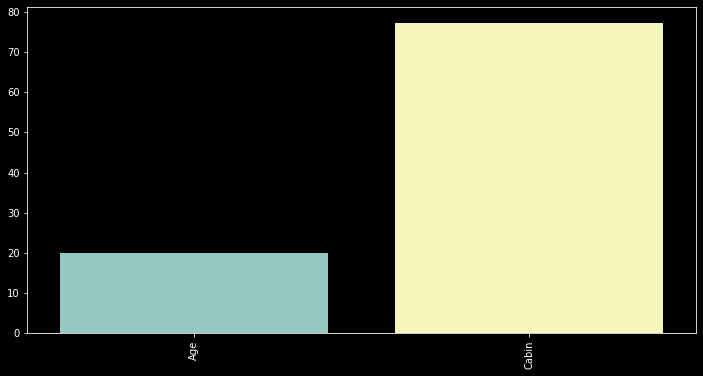

In [20]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [21]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

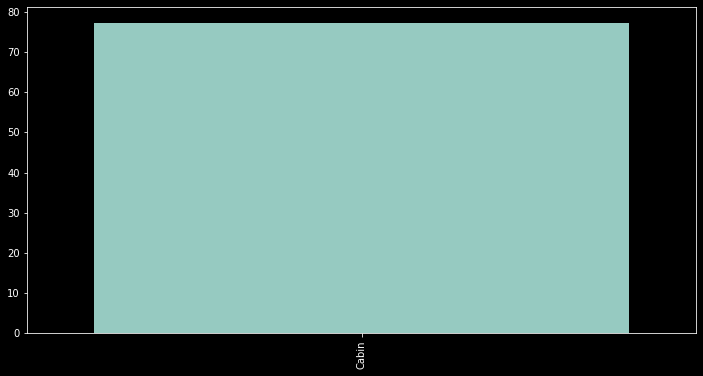

In [22]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [23]:
df_train=df_train.drop(['Cabin'], axis=1)

In [24]:
nan_percent= missing_percent(df_train)
nan_percent

Series([], dtype: float64)

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Test set
</h1>
</div>

In [25]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [26]:
pd.DataFrame([df_test.corr()['Survived'].sort_values()])

,Pclass,PassengerId,Age,SibSp,Parch,Fare,Survived
Survived,-0.108615,-0.023245,-0.000013,0.099943,0.15912,0.191514,1.0


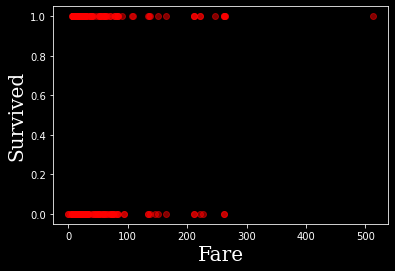

In [27]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

plt.style.use('dark_background')

fig, ax = plt.subplots()

X=df_test['Fare']
y=df_test['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y, 'ro', alpha=0.5)

In [28]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [29]:
100*(df_test.isnull().sum()/len(df_test))

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [30]:
nan_percent= missing_percent(df_test)
nan_percent

Fare      0.239234
Age      20.574163
Cabin    78.229665
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Fare'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

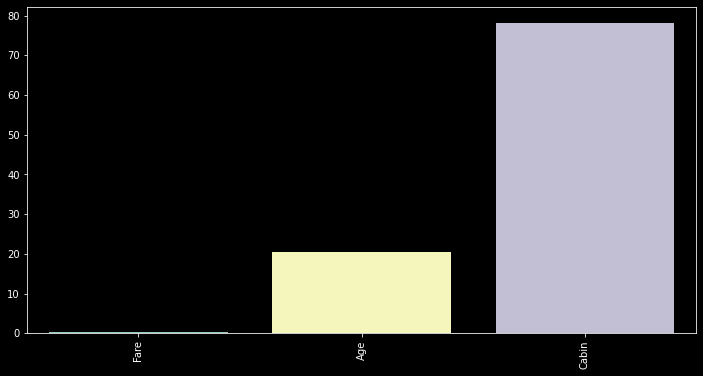

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [32]:
nan_percent[nan_percent<1].index

Index(['Fare'], dtype='object')

In [33]:
df_test[df_test['Fare'].isnull()]

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [34]:
df_test= df_test.dropna(axis=0, subset=['Fare'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

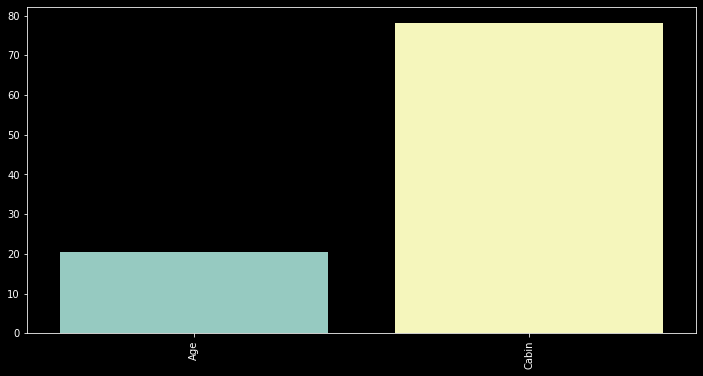

In [35]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)


In [36]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

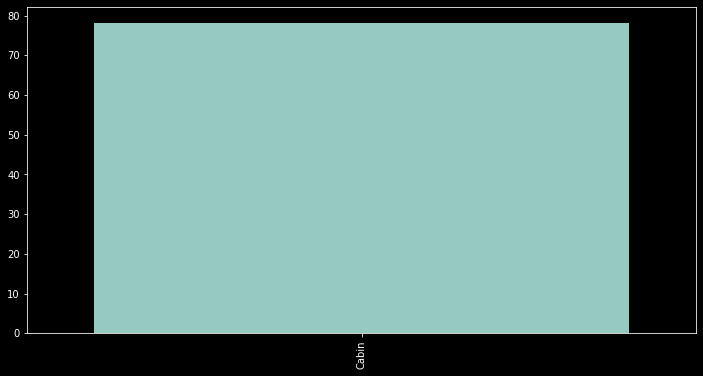

In [37]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [38]:
df_test=df_test.drop(['Cabin'], axis=1)

In [39]:
nan_percent= missing_percent(df_test)
nan_percent

Series([], dtype: float64)

In [40]:
df_train.drop(['Name','Ticket'], axis = 1, inplace=True)
df_test.drop(['Name','Ticket'], axis = 1, inplace=True)

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="padding: 15px;
           color:#D81F26;">
Hint: Now, we don't have any Missing Data.
</h1>
</div>

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Creating Dummy Variables
</h1>
</div>

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Train set
</h1>
</div>

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [42]:
df_train.shape

(889, 9)

In [43]:
df_train['Survived'] = df_train['Survived'].apply(str)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [45]:
df_train['Pclass'] = df_train['Pclass'].apply(str)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 69.5+ KB


In [47]:
df_train_num = df_train.select_dtypes(exclude='object')
df_train_obj = df_train.select_dtypes(include='object')

In [48]:
df_train_obj.drop('Survived', axis = 1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_train_obj = pd.get_dummies(df_train_obj, drop_first=True)

In [50]:
Final_train_df = pd.concat([df_train_num, df_train_obj,df_train['Survived']], axis=1)

Final_train_df

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,1,1,0,1,0
1,2,38.0,1,0,71.2833,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,0,1,1
3,4,35.0,1,0,53.1000,0,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,1,0,1,0,1,0
887,888,19.0,0,0,30.0000,0,0,0,0,1,1
888,889,28.0,1,2,23.4500,0,1,0,0,1,0
889,890,26.0,0,0,30.0000,0,0,1,0,0,1


In [51]:
Final_train_df.shape

(889, 11)

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Test set
</h1>
</div>

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 32.7+ KB


In [53]:
df_test.shape

(418, 9)

In [54]:
df_test['Survived'] = df_test['Survived'].apply(str)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Survived     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 32.7+ KB


In [56]:
df_test['Pclass'] = df_test['Pclass'].apply(str)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Survived     418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB


In [58]:
df_test_num = df_test.select_dtypes(exclude='object')
df_test_obj = df_test.select_dtypes(include='object')

In [59]:
df_test_obj.drop('Survived', axis = 1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
df_test_obj = pd.get_dummies(df_test_obj, drop_first=True)

In [61]:
Final_test_df = pd.concat([df_test_num, df_test_obj,df_test['Survived']], axis=1)

In [62]:
X_train=Final_train_df.drop('Survived', axis = 1)
y_train=Final_train_df['Survived']

X_test=Final_test_df.drop('Survived', axis = 1)
y_test = Final_test_df['Survived']

In [63]:
X_train.shape

(889, 10)

In [64]:
X_test.shape

(418, 10)

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Scaling Data
</h1>
</div>

In [65]:
scaler= StandardScaler()

scaler.fit(X_train)

StandardScaler()

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Build the model
</h1>
</div>

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h2 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Train
</h2>
</div>

In [66]:
Logistic_model = LogisticRegression(max_iter=4000)

Logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Predict
</h1>
</div>

In [67]:
y_pred = Logistic_model.predict(X_test)

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Evaluate model
</h1>
</div>

In [68]:
confusion_matrix(y_test, y_pred)

array([[254,  12],
       [  9, 143]])

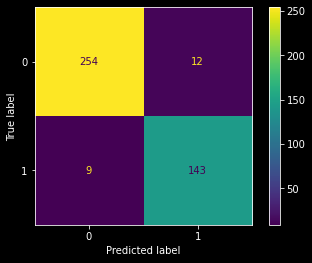

In [69]:
plot_confusion_matrix(Logistic_model, X_test, y_test)

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Accuracy
</h1>
</div>

In [70]:
accuracy_score(y_test, y_pred)

0.9497607655502392

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Precision score
</h1>
</div>

In [71]:
precision_score(y_test, y_pred,average='macro')

0.9441800564209494

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Recall score
</h1>
</div>

In [72]:
recall_score(y_test, y_pred, average='macro')

0.9478383458646616

<div style="color:#D81F26;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#7F7F7F;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h2 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Curves & AUC
</h2>
</div>

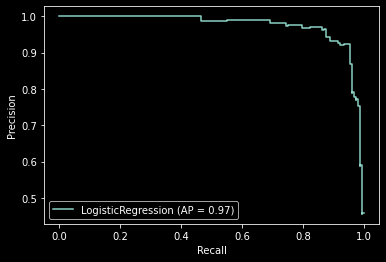

In [73]:
plot_precision_recall_curve(Logistic_model, X_test, y_test)

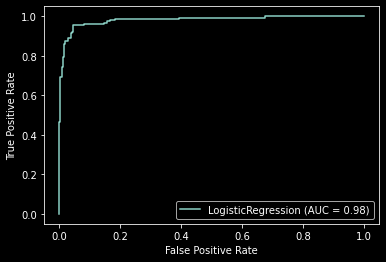

In [74]:
plot_roc_curve(Logistic_model, X_test, y_test)

In [75]:
pd.DataFrame({ '':['Accuracy','precision','recall'],'Value': [accuracy_score(y_test, y_pred),
                precision_score(y_test, y_pred,average='macro'),recall_score(y_test, y_pred, average='macro')]})

,,Value
0,Accuracy,0.949761
1,precision,0.944180
2,recall,0.947838


<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Submitting the predicted data
</h1>
</div>

In [76]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = y_pred
submission.to_csv('Logistic_Reg_submission.csv',index=False)

<div style="color: #D81F26;
           display:fill;
           border-radius:0px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737 ;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px;">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Finished!
</h1>    
<hr>

<p style="color:white;">If you liked this text or it was useful for you, please give me feedback (Upvoted & Comments).</p>